# Regresi Tunggal
Regresi Polinomial Tunggal adalah Bentuk analisis regresi di mana hubungan antara variabel bebas x dan variabel terikat y dimodelkan sebagai polinomial dalam x . <br>
Model regresi polinomial<br>

$\displaystyle {\begin{bmatrix}\sum _{i=1}^{n}x_{i}^{0}&\sum _{i=1}^{n}x_{i}^{1}&\sum _{i=1}^{n}x_{i}^{2}&\cdots &\sum _{i=1}^{n}x_{i}^{m}\\\sum _{i=1}^{n}x_{i}^{1}&\sum _{i=1}^{n}x_{i}^{2}&\sum _{i=1}^{n}x_{i}^{3}&\cdots &\sum _{i=1}^{n}x_{i}^{m+1}\\\sum _{i=1}^{n}x_{i}^{2}&\sum _{i=1}^{n}x_{i}^{3}&\sum _{i=1}^{n}x_{i}^{4}&\cdots &\sum _{i=1}^{n}x_{i}^{m+2}\\\vdots &\vdots &\vdots &\ddots &\vdots \\\sum _{i=1}^{n}x_{i}^{m}&\sum _{i=1}^{n}x_{i}^{m+1}&\sum _{i=1}^{n}x_{i}^{m+2}&\dots &\sum _{i=1}^{n}x_{i}^{2m}\\\end{bmatrix}}{\begin{bmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\cdots \\\beta _{m}\\\end{bmatrix}}={\begin{bmatrix}\sum _{i=1}^{n}y_{i}x_{i}^{0}\\\sum _{i=1}^{n}y_{i}x_{i}^{1}\\\sum _{i=1}^{n}y_{i}x_{i}^{2}\\\cdots \\\sum _{i=1}^{n}y_{i}x_{i}^{m}\\\end{bmatrix}}$

In [264]:
# Libary
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# untuk tabulate                       
headers = ["i","fx"] 

def construct(x, y, m):
    """
    fungsi untuk mencari persamaan fungsi dengan menggunakan regresi polinomial.

    Parameters:
    x (array-like): Data input (variabel independen).
    y (array-like): Data output (variabel dependen).
    m (int): Derajat polinomial (matriks akan berukuran (m+1) x (m+1)).

    """
    x = np.asarray(x)
    y = np.asarray(y)
    size = m + 1

    # Inisialisasi matriks
    XTX = np.zeros((size, size))

    # Mengisi matriks
    for i in range(size):
        for j in range(size):
            exponent = i + j
            XTX[i, j] = np.sum(x ** exponent)

    # Inisialisasi vektor
    XTY = np.zeros(size)

    # Mengisi vektor
    for i in range(size):
        exponent = i
        XTY[i] = np.sum(y * (x ** exponent))

    # Mencari matix v
    XTX_inv = np.linalg.inv(XTX)
    v = XTX_inv @ XTY

    fx = []
    n = len(x)
    hasil_fx = 0

    for i in range(n):
        hasil_fx = 0
        for j in range(size):
            hasil_fx += (v[j]*(x[i]**j))
        fx.append(hasil_fx)
        data.append([i,hasil_fx]) 
        
    return v,fx


## Linear

Regresi linier tunggal digunakan untuk memodelkan hubungan linier antara satu variabel independen (X)dan satu variabel dependen (Y) <br>
Bentuk umum dari persamaan linier, dapat dituliskan sebagai berikut:<br>
$\displaystyle y=\beta _{0}+\beta _{1}x+\varepsilon ,\,$

+---+--------------------+
| i |         fx         |
+---+--------------------+
| 0 | 0.4626160337552736 |
| 1 | 0.9919831223628685 |
| 2 |  1.1684388185654   |
| 3 | 1.521350210970463  |
| 4 | 1.521350210970463  |
| 5 | 1.8742616033755264 |
+---+--------------------+
persamaan : 0.28616033755274195 + 1.764556962025316x


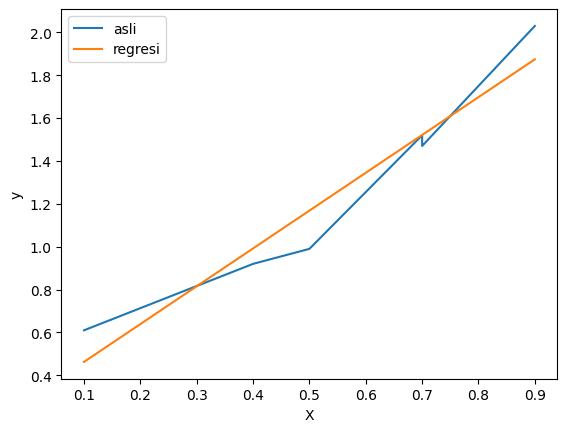

In [265]:
x = [0.1,0.4,0.5,0.7,0.7,0.9]
y = [0.61,0.92,0.99,1.52,1.47,2.03]
m = 1
data = []   

plt.plot(x,y, label = "asli")
v,fx = construct(x,y,m)
print(tabulate(data, headers=headers, tablefmt="pretty")) 

print(f'persamaan : {v[0]} + {v[1]}x')
plt.plot(x,fx, label = "regresi")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

## Non Linear (Kuadrat)
Berdasarkan diagram besaran dan residual plot, model linear bukanlah pilihan yang paling bagus untuk memodelkan data. Regresi linear memiliki terlalu banyak galat. Plot residual menunjukan kurva terdefinisi. Ini menunjukan bahwa mungkin model regresi yang paling bagus adalah model non-linear. Regresi nonlinier merupakan regresi polinomial yang menambahkan variabel independen yang dipangkatkan dari variabel yang asli; x, x2, x3…,xn<br>
Bentuk Umum: <br>
$\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\varepsilon .\,$

+---+--------------------+
| i |         fx         |
+---+--------------------+
| 0 | 0.6103208487792372 |
| 1 | 0.8874805061996667 |
| 2 | 1.0490489582001794 |
| 3 | 1.4759587114917592 |
| 4 | 1.4759587114917592 |
| 5 | 2.0412322638374123 |
+---+--------------------+
persamaan : 0.5871161958327971 + 0.05909178064681061x + 1.729547488175908x^2


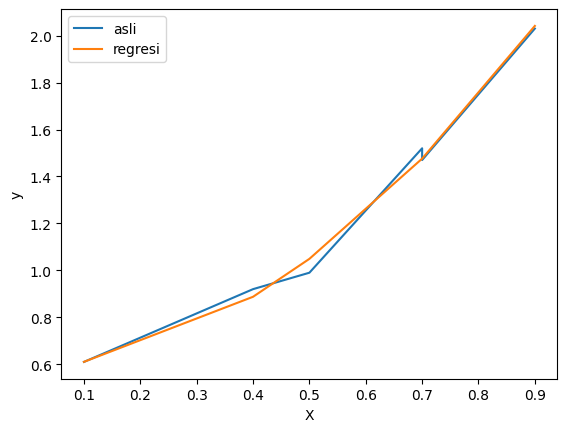

In [266]:
x = [0.1,0.4,0.5,0.7,0.7,0.9]
y = [0.61,0.92,0.99,1.52,1.47,2.03]
m = 2

data = []

plt.plot(x,y, label = "asli")
v,fx = construct(x,y,m)
print(tabulate(data, headers=headers, tablefmt="pretty")) 

print(f'persamaan : {v[0]} + {v[1]}x + {v[2]}x^2')
plt.plot(x,fx, label = "regresi")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

# Regresi Ganda

Regresi ganda adalah teknik statistik yang digunakan untuk memodelkan hubungan antara satu variabel dependen (respon) dengan dua atau lebih variabel independen (prediktor), memungkinkan kita memahami bagaimana variabel dependen dipengaruhi oleh beberapa variabel lain. 

In [257]:
# libary
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from tabulate import tabulate

def construct(x, y, m):
    """
    Fungsi untuk mencari persamaan fungsi dengan menggunakan regresi polinomial ganda.

    Parameters:
    x (array-like 2D): Data input (variabel independen) dengan setiap baris adalah sampel dan kolom adalah fitur.
    y (array-like): Data output (variabel dependen).
    m (int): Derajat polinomial maksimal.
    """
    
    x = np.asarray(x)
    y = np.asarray(y)
    
    # Jika x adalah 1D, ubah menjadi 2D
    if x.ndim == 1:
        x = x.reshape(-1, 1)
    n_samples, n_features = x.shape
    
    # Generate semua kombinasi eksponen (termasuk interaksi)
    terms = []
    for degrees in product(range(m+1), repeat=n_features):
        if sum(degrees) <= m:
            terms.append(degrees)
    size = len(terms)
    
    # Inisialisasi matriks XTX dan vektor XTY
    XTX = np.zeros((size, size))
    XTY = np.zeros(size)
    
    # Hitung XTX dan XTY
    for i in range(size):
        for j in range(i, size):
            # Hitung produk untuk setiap data point
            XTX[i, j] = np.sum(np.prod(x**np.array([terms[i]]), axis=1) * np.prod(x**np.array([terms[j]]), axis=1))
            XTX[j, i] = XTX[i, j]
        # Hitung XTY
        XTY[i] = np.sum(y * np.prod(x**np.array([terms[i]]), axis=1))
    
    # Mencari koefisien v
    # Ganti bagian kode inversi matriks:
    XTX_inv = np.linalg.inv(XTX + 1e-6 * np.eye(XTX.shape[0]))
    v = XTX_inv @ XTY

    
    # Hitung nilai prediksi
    hasil_fx = []
    i = 1
    for sample in x:
        pred = 0
        for j, term in enumerate(terms):
            pred += v[j] * np.prod(sample**term)
        data.append([i,pred])  
        hasil_fx.append(pred)
        i += 1
    
    return v, hasil_fx


## Linear
Regresi Linier Ganda (Multiple Linear Regression) adalah teknik statistika untuk memodelkan hubungan linear antara satu variabel dependen (terikat) dan dua atau lebih variabel independen (bebas). Tujuannya adalah memahami seberapa besar pengaruh variabel-variabel independen terhadap variabel dependen sekaligus memprediksi nilainya. Perbedaan paling jelas antara Regresi Tunggal dengan Regresi Ganda ialah jika Regresi Tunggal hanya memiliki Satu Variabel terikat dan Satu Variabel bebas sedangkan pada Regresi Ganda memiliki satu Variabel Terikat dan dua atau lebih Variabel bebas.<br>
Bentuk Umum: <br>
$\displaystyle y=\beta _{0}+\beta _{1}x_1+\beta _{2}x_2+\varepsilon ,\,$

Koefisien regresi: [-44.80897303  14.53294348  87.63999416]
+---+-------------------+
| i |        fx         |
+---+-------------------+
| 1 | 555.3637648804586 |
| 2 | 584.2084852037435 |
| 3 | 523.0816559277077 |
| 4 | 660.0894245997043 |
| 5 | 482.2567141973988 |
+---+-------------------+


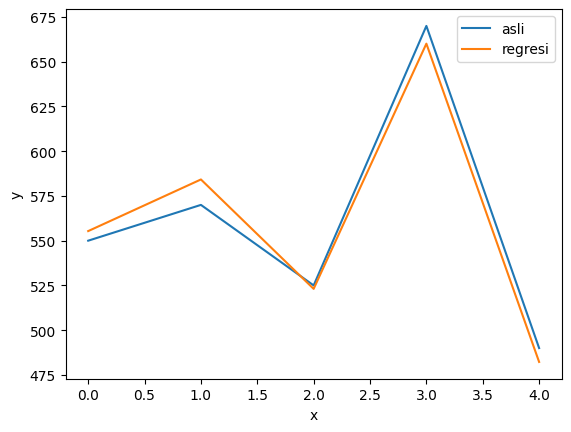

In [258]:
x1 = np.array([3.2,2.7,2.5,3.4,2.2])
x2 = np.array([22,27,24,28,23]) 
y = np.array([550,570,525,670,490])
m = 1 

data = []
x = np.column_stack((x1, x2))

plt.plot(y, label = "asli")
v, fx = construct(x, y, m)
plt.plot(fx, label = "regresi")

print("Koefisien regresi:", coefficients)
print(tabulate(data, headers=headers, tablefmt="pretty")) 

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

# Non Linear (Kuadrat)
Regresi ganda non linier adalah metode statistik untuk memodelkan hubungan nonlinier antara beberapa variabel independen (X₁, X₂, ..., Xₚ) dan satu variabel dependen (Y). Model ini tidak linier dalam parameter, sehingga tidak dapat dijelaskan oleh kombinasi linier sederhana seperti pada regresi linier.<br>
$\displaystyle y=\beta _{0}+\beta_{1}x_1+\beta_{2}x_2+\beta_{3}x_1^2+\beta_{4}x_2^2+\beta_{5}x_1 x_2+\varepsilon ,\,$

Koefisien regresi: [  21.50708765   41.41121784   -1.18945155 -184.68466097   10.44347894
    4.77648061]
+---+--------------------+
| i |         fx         |
+---+--------------------+
| 1 | 550.0004942028224  |
| 2 | 570.0013638944738  |
| 3 | 525.0023114050273  |
| 4 | 669.9986364654825  |
| 5 | 489.99717495081944 |
+---+--------------------+


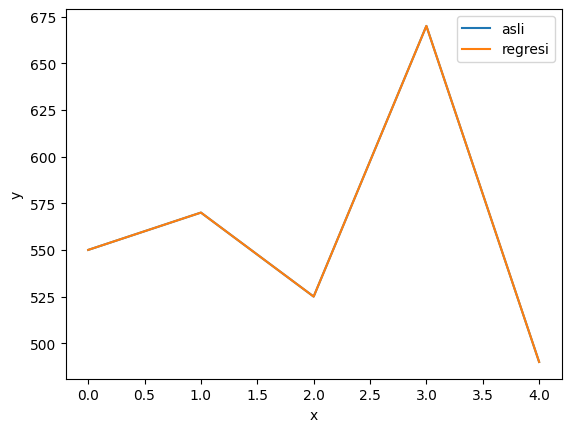

In [261]:
x1 = np.array([3.2,2.7,2.5,3.4,2.2])
x2 = np.array([22,27,24,28,23]) 
y = np.array([550,570,525,670,490])
m = 2

data = []
x = np.column_stack((x1, x2))

plt.plot(y, label = "asli")
v, fx = construct(x, y, m)
plt.plot(fx, label = "regresi")

print("Koefisien regresi:", v)
print(tabulate(data, headers=headers, tablefmt="pretty")) 

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()